In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import seaborn as sns

In [9]:
df=pd.read_csv(r'diabetes.csv')

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.isna().sum()
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)
def deal_with_Nan(column):   
    temp = df[df[column].notnull()]
    temp = temp[[column, 'Outcome']].groupby(['Outcome'])[[column]].median().reset_index()
    return temp
df.isna().sum()
columns = df.iloc[:,:-1]
columns 
for column in columns: # dealing with missing values
    deal_with_Nan(column)
    df.loc[(df['Outcome'] == 0 ) & (df[column].isna()), column] = deal_with_Nan(column)[column][0]
    df.loc[(df['Outcome'] == 1 ) &  (df[column].isna()),column] = deal_with_Nan(column)[column][1]
    

In [12]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


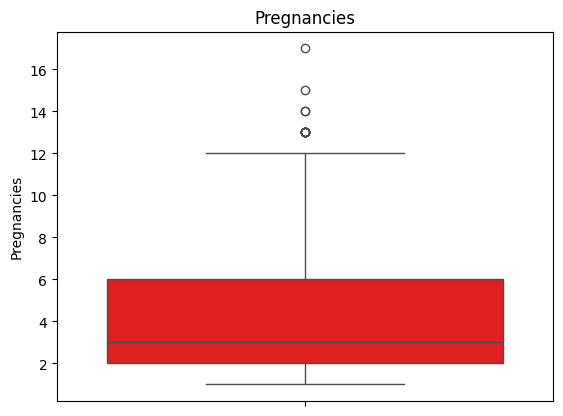

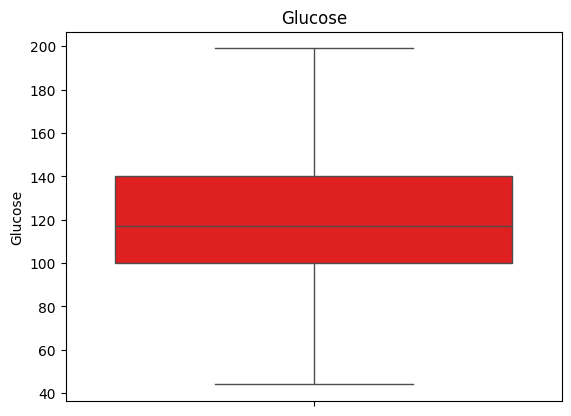

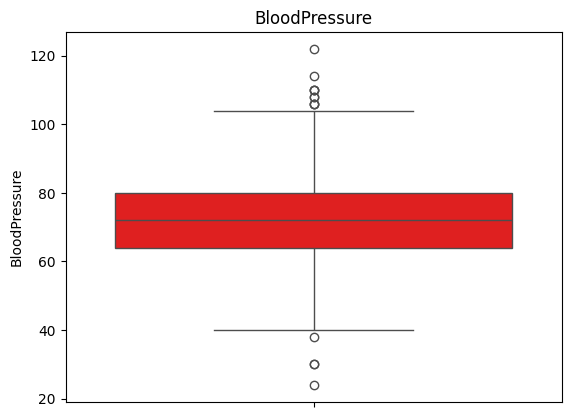

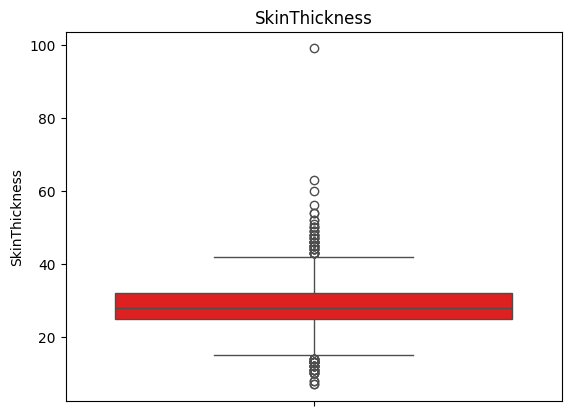

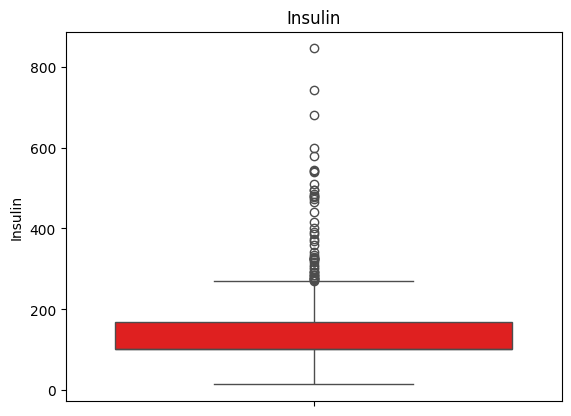

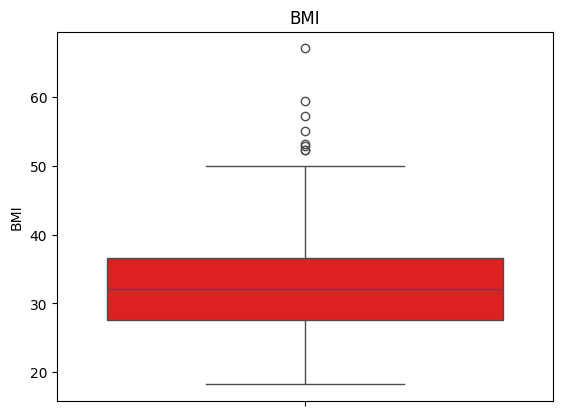

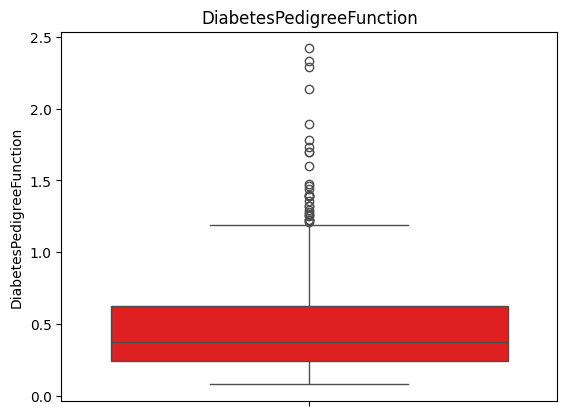

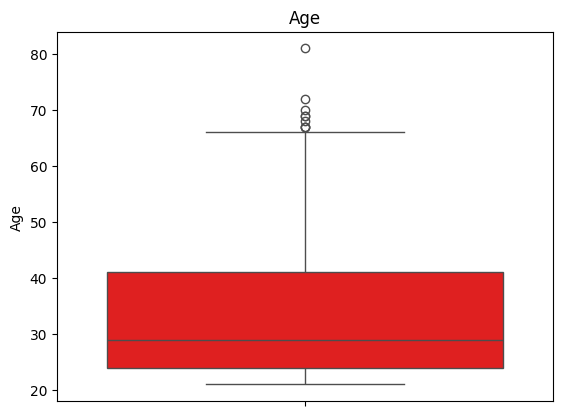

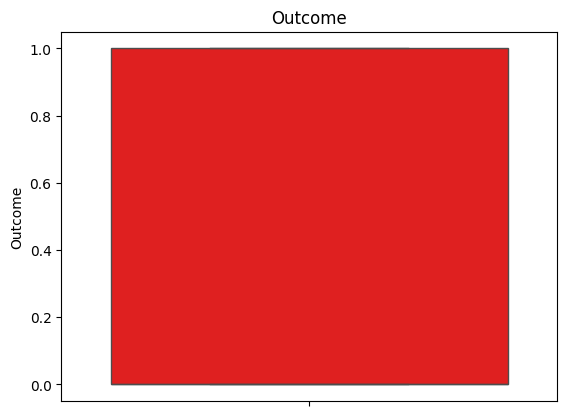

In [13]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Ensure column is numeric
        Q3 = df[column].quantile(0.75)
        Q1 = df[column].quantile(0.25)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Check for outliers
        if (df[column] > upper_bound).any():
            print(column, "yes")
        else:
            print(column, "no")
    else:
        print(column, "not numeric")
for column in df.columns: # plots for detecting outliers
    plt.figure()
    sns.boxplot(df[column], color ="red")
    plt.title(column)
    plt.show()
def clean_outliers(data,column): # function for clearing outliers
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    lower_filter = lower_bound < data[column]
    upper_filter = upper_bound > data[column]
    cleaned_data = lower_filter & upper_filter 
    data = data[cleaned_data]
    ##print("{} of dataset after column {}".format(data.shape, columns))
    return data
df_clean = df.copy() # clearing outliers (deleting them)
for c in df.columns:
    df_clean = clean_outliers(df_clean,c)
df_clean.shape
X = df_clean.drop('Outcome', axis = 1) # defining what I will be predicting ( the Outcome value)
Y = df_clean['Outcome']


In [14]:
x_train_set=X[0:458]
x_test_set=X[458:573]
x_train=np.array(x_train_set)
x_test=np.array(x_test_set)
y_train_set=Y[0:458]
y_test_set=Y[458:573]
y_train=np.array(y_train_set)
y_test=np.array(y_test_set)

y_train=y_train.T
y_train=y_train.reshape((1,458))
y_test=y_test.T
y_test=y_test.reshape((1,115))
x_train=x_train.T
x_test=x_test.T
def z_normalization(X):
    m = np.mean(X, axis=1, keepdims=True)
    sig = np.std(X, axis=1, keepdims=True)
    normalized_x = (X - m) / sig
    return normalized_x
x_train=z_normalization(x_train)
x_test=z_normalization(x_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8, 458)
(8, 115)
(1, 458)
(1, 115)


In [ ]:
# train_set=data_set[0:1200]
# test_set=data_set[1200:1600]
# train_set=np.array(train_set)
# test_set=np.array(test_set)

# x_train=train_set[:,:11]
# y_train=train_set[:,11]
# y_train=y_train.reshape((1,1200))

# x_test=test_set[:,:11]
# y_test=test_set[:,11]
# y_test=y_test.reshape((1,399))

# x_train=x_train.T
# x_test=x_test.T
# x_train=x_train.astype(float)
# x_test=x_test.astype(float)
# def z_normalization(X):
#     m = np.mean(X, axis=1, keepdims=True)
#     sig = np.std(X, axis=1, keepdims=True)
#     normalized_x = (X - m) / sig
#     return normalized_x
# x_train=z_normalization(x_train)
# x_test=z_normalization(x_test)

# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# y_train = np.where(y_train=="good", 1.0, 0.0)
# y_test = np.where(y_test=="good", 1.0, 0.0)
# print(y_train)
# print(y_test)
# # print(np.isnan(x_train))

In [15]:
def init_params(layers_dims):
    L=len(layers_dims)
    params={}
    for i in range(1,L):
        params["W"+str(i)]=np.random.randn(layers_dims[i],layers_dims[i-1])*np.sqrt(2/layers_dims[i-1])
        params["b"+str(i)]=np.zeros((layers_dims[i],1))
    return params

In [16]:
def tan(Z):
    cache=(Z)
    return np.tanh(Z),cache
def relu(Z):
    cache=(Z)
    return np.maximum(0,Z),cache
def sigmoid(Z):
    A=1/(1+(np.exp(-Z)))
    cache=(Z)
    return A,Z
def linear_model(A,W,b):
    z=np.dot(W,A)+b
    cache=(A,W,b)
    return z,cache
def linear_model_activation(Aprev,W,b,activation):
    if activation=="tanh":
        Z,linear_cache=linear_model(Aprev,W,b)
        A,activation_cache=tan(Z)
    elif activation=="sigmoid":
        Z,linear_cache=linear_model(Aprev,W,b)
        A,activation_cache=sigmoid(Z)
    cache=(linear_cache,activation_cache)
    return A,cache
def linear_model_LLayer(X,params):
    L=len(params)//2
    caches=[]
    A=X
    for i in range(1,L):
        Aprev=A
        A,cache=linear_model_activation(Aprev,params["W"+str(i)],params["b"+str(i)],"tanh")
        caches.append(cache)
    AL,cache=linear_model_activation(A,params["W"+str(L)],params["b"+str(L)],"sigmoid")
    caches.append(cache)
    return AL,caches

In [17]:
def cost(AL,Y):
    m=Y.shape[1]
    cost=(1./-m)*(np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL),axis=1))
    return cost

In [18]:
#Backward Propagation
# def sigmoid_backward(
def tanh_backward(dAprev,cache):
    Z=cache
    dZ=dAprev*(1-(np.tanh(Z))**2)
    return dZ
def relu_backward(dAprev,cache):
    Z=cache
    dZ=dAprev*(np.heaviside(Z, 0))
def sigmoid_backward(dAprev,cache):
    Z=cache
    S=(1.0/(1.0+np.exp(-Z)))
    dZ=dAprev*(S)*(1-S)
    return dZ
def backward_model(dZ,cache):
    Aprev,W,b=cache
    m=Aprev.shape[1]
    dW=(1./m)*np.dot(dZ,(Aprev.T))
    db=(1./m)*np.sum(dZ,axis=1,keepdims=True)
    dAprev=np.dot(W.T,dZ)
    return dW,db,dAprev
def backward_model_activation(dA,cache,activation):
    linear_cache,activation_cache=cache
    if activation=="tanh":
        dZ=tanh_backward(dA,activation_cache)
        dW,db,dAprev=backward_model(dZ,linear_cache)
    elif activation=="sigmoid":
        dZ=sigmoid_backward(dA,activation_cache)
        dW,db,dAprev=backward_model(dZ,linear_cache)
    return dW,db,dAprev
def backward_model_LLayer(AL,Y,cache):
    grads={}
    L=len(cache)
    dAL=-(np.divide(Y,AL)-np.divide((1-Y),(1-AL)))
    current_cache=cache[L-1]
    dW,db,dAprev=backward_model_activation(dAL,current_cache,"sigmoid")
    grads["dW"+str(L)]=dW
    grads["db"+str(L)]=db
    grads["dA"+str(L-1)]=dAprev
    for i in reversed(range(L-1)):
        current_cache=cache[i]
        dW,db,dAprev=backward_model_activation(dAprev,current_cache,"tanh")
        grads["dW"+str(i+1)]=dW
        grads["db"+str(i+1)]=db
        grads["dA"+str(i)]=dAprev
    return grads
        

In [19]:
def update_params(params,grads,learning_rate):
    p=copy.deepcopy(params)
    L=len(params)//2
    for i in range(1,L+1):
        p["W"+str(i)]-=learning_rate*grads["dW"+str(i)]
        p["b"+str(i)]-=learning_rate*grads["db"+str(i)]
    return p

In [20]:
def L_model(X,Y,layers_dims,iterations,learning_rate):
    params=init_params(layers_dims)
    j_cost=[]
    j_iter=[]
    for i in range(iterations):
        AL,cache=linear_model_LLayer(X,params)
        cost_temp=cost(AL,Y)
        grads=backward_model_LLayer(AL,Y,cache)
        params=update_params(params,grads,learning_rate)
        if i%100==0 or i==iterations-1:
            j_cost.append(cost_temp)
            j_iter.append(i)
            # print(f"cost:{cost_temp}")
    return params,j_cost,j_iter

In [21]:
def predict(X,Y,params):
    AL,cache=linear_model_LLayer(X,params)
    Y_hat=actual_predict(AL)
    accuracy=np.mean(Y==Y_hat)
    print(f"Accuracy: {accuracy}")
    return Y_hat
    
def actual_predict(AL):
    y_hat=(AL>=0.5).astype(int)
    return y_hat

Accuracy: 0.9082969432314411
Accuracy: 0.8521739130434782


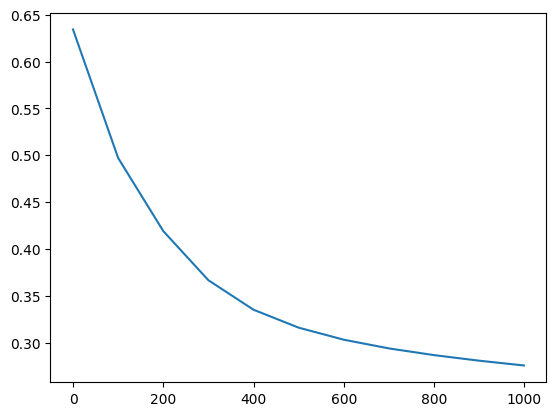

In [28]:
layers_dims = [8, 11,7, 2, 1] #  4-layer model
learning_rate=0.03
iterations=1000
params,j_cost,j_iter=L_model(x_train,y_train,layers_dims,iterations,learning_rate)
y_train_predict=predict(x_train,y_train,params)
y_test_predict=predict(x_test,y_test,params)
plt.plot(j_iter,j_cost)